In [2]:
import zipfile as zp
import pandas as pd

dz = zp.ZipFile("/content/archive (1).zip")
data = pd.read_csv(dz.open("train.csv"))
data_copy = data.copy()

data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [5]:
data.isna().sum()

,0
x,0
y,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [8]:
data.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [26]:
print(round(((data.isna().sum() / len(data)) * 100), 2))

x    0.00
y    0.14
dtype: float64


In [28]:
data.dropna(inplace = True)

In [29]:
data.isnull().sum()

,0
x,0
y,0


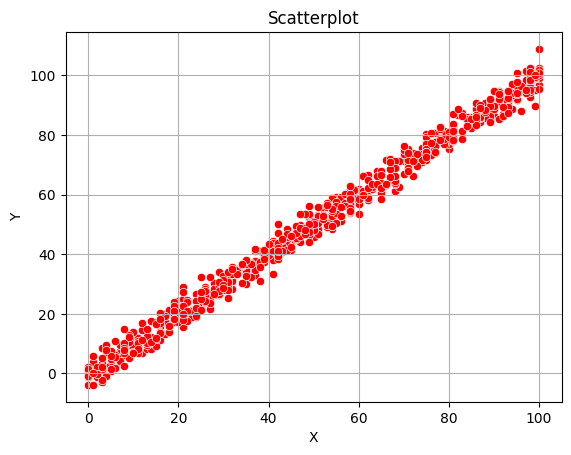

In [44]:
#Visualize the data

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data = data, x = "x", y = "y", color = "red")
plt.title("Scatterplot")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

x = data["x"].values.reshape(-1, 1)
y = data["y"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state = 0)

In [33]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(y_test, pred)
print(f"R2 score: {r2}")

mse = mean_squared_error(y_test, pred)
print("MSE: ", mse)

R2 score: 0.9916592070219102
MSE:  7.5514907003764895


In [47]:
data.shape

(699, 2)

In [49]:
from sklearn.model_selection import cross_val_score

# Cross-validation score
cv_scores = cross_val_score(model, x, y, cv=5, scoring='r2')
print(f"Cross-validation R2 scores: {cv_scores}")
print(f"Mean R2 score from CV: {cv_scores.mean():.4f}")

Cross-validation R2 scores: [0.9887418  0.98975303 0.9922575  0.99023067 0.99089936]
Mean R2 score from CV: 0.9904


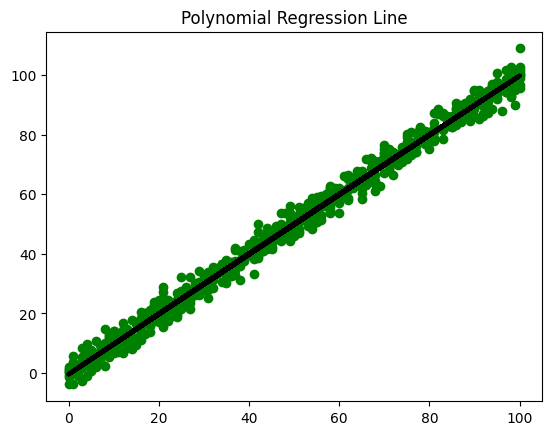

In [62]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(x)
model.fit(x_poly, y)
pred_p = model.predict(x_poly)

plt.scatter(x, y, color='g')
plt.plot(x, pred_p, color='k', linestyle = "--", linewidth = 3)
plt.title("Polynomial Regression Line")
plt.show()

#Its R2 score is +99%. When it's pretty high it looks a bit anormal, but our dataset contains 699 rows, it is small too. Eventually, model works overall.